## Assignment 7 by Celina Cywinska (s22946)

In [30]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

In [6]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [7]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

### 📚 Task 1
##### Create the new variable "f1", refer to early stopping class, enter the appropriate values (whatever you want, but enter "10" for the patience variable) for parameters such as monitor, mode, verbose and patience.

In [8]:
# This callback will stop the training when there is no improvement in the loss for 10 consecutive epochs.
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

### 📚 Task 2
##### Create the new variable "f2", refer to ModelCheckpoint class, enter a name for your model and the appropriate values for the monitor, mode, verbose and save_best_only parameters (again - whatever you want, experiment 🔬).


In [13]:
f2 = ModelCheckpoint(filepath='task2model', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

### 📚 Task 3
##### Create the new variable "history". This variable should contain the training data (x), trning data labels (y), test data (a), test data labels (b) and the corresponding epochs and verbose parameters created in the previous step. For labels, to_categorical () can be a useful function.


In [14]:
history = model.fit(
  x=train_images,
  y=to_categorical(train_labels),
  validation_data=(test_images, to_categorical(test_labels)),
  epochs=10,
  verbose=1,
  batch_size=30,
  callbacks=[f1, f2]  #callbacks

Epoch 1/10
 125/2000 [>.............................] - ETA: 0s - loss: 1.1242 - accuracy: 0.6544  

2023-04-18 10:59:01.920622: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1951/2000 [============================>.] - ETA: 0s - loss: 0.3632 - accuracy: 0.8896
Epoch 1: val_accuracy improved from -inf to 0.93560, saving model to task2model
INFO:tensorflow:Assets written to: task2model/assets
2000/2000 [==============================] - 1s 642us/step - loss: 0.3595 - accuracy: 0.8908 - val_loss: 0.2133 - val_accuracy: 0.9356
Epoch 2/10
1883/2000 [===========================>..] - ETA: 0s - loss: 0.1849 - accuracy: 0.9441
Epoch 2: val_accuracy improved from 0.93560 to 0.95100, saving model to task2model
INFO:tensorflow:Assets written to: task2model/assets
2000/2000 [==============================] - 1s 543us/step - loss: 0.1846 - accuracy: 0.9440 - val_loss: 0.1634 - val_accuracy: 0.9510
Epoch 3/10
1933/2000 [===========================>..] - ETA: 0s - loss: 0.1456 - accuracy: 0.9553
Epoch 3: val_accuracy improved from 0.95100 to 0.95690, saving model to task2model
INFO:tensorflow:Assets written to: task2model/assets
2000/2000 [==============================]

### 📚 Task 4
##### Create the new variable "trained_model", load the model using the model name from the second point.

In [18]:
trained_model = load_model('task2model')

### 📚 Task 5
##### Create the new variable "train_accuracy", refer to trained_model.evaluate class, use training data (x) and training data labels (y).

In [20]:
train_accuracy = trained_model.evaluate(
    x=train_images,
    y=to_categorical(train_labels),
    batch_size=30,
    verbose=1,
    callbacks=[f1, f2]
)

2000/2000 [==============================] - 1s 270us/step - loss: 0.0574 - accuracy: 0.9821


### 📚 Task 6
##### Create the new variable "test_accuracy", refer to trained_model.evaluate class, use test data (a) and test data labels (b).


In [21]:
test_accuracy = trained_model.evaluate(
    x=test_images,
    y=to_categorical(test_labels),
    batch_size=30,
    verbose=1,
    callbacks=[f1, f2]
)

334/334 [==============================] - 0s 289us/step - loss: 0.0896 - accuracy: 0.9713


### 📚 Task 7
##### Perform network training for 100 epochs. When will it end?

In [23]:
model.fit(
  x=train_images,
  y=to_categorical(train_labels),
  validation_data=(test_images, to_categorical(test_labels)),
  epochs=100,
  verbose=1,
  batch_size=30,
  callbacks=[f1, f2]
)

# the patience variable is set to 10 so after it doesn't improve after ten times

Epoch 1/100
1911/2000 [===========================>..] - ETA: 0s - loss: 0.0125 - accuracy: 0.9965
Epoch 1: val_accuracy improved from 0.97130 to 0.97460, saving model to task2model
INFO:tensorflow:Assets written to: task2model/assets
2000/2000 [==============================] - 1s 601us/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.2466 - val_accuracy: 0.9746
Epoch 2/100
1923/2000 [===========================>..] - ETA: 0s - loss: 0.0151 - accuracy: 0.9958
Epoch 2: val_accuracy did not improve from 0.97460
2000/2000 [==============================] - 1s 463us/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.2845 - val_accuracy: 0.9720
Epoch 3/100
1935/2000 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9957
Epoch 3: val_accuracy did not improve from 0.97460
2000/2000 [==============================] - 1s 462us/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.2940 - val_accuracy: 0.9730
Epoch 4/100
1979/2000 [============================>.] - ETA

### 📚 Task 8
##### Show information concerning accuracy of the classification on the training and test material.

In [28]:
# [loss, accuracy]
print("Train loss and accuracy: ", train_accuracy)
print("Test loss and accuracy: ", test_accuracy)

Train loss and accuracy:  [0.05736484006047249, 0.9821166396141052]
Test loss and accuracy:  [0.0895533412694931, 0.9713000059127808]


### 📚 Task 9
##### Generate a chart showing the network learning process.

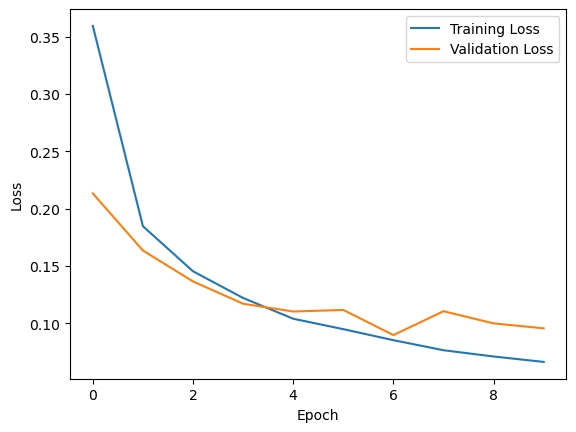

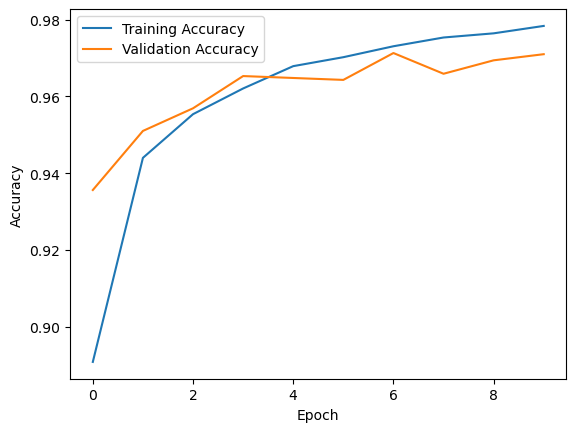

In [32]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 📚 Task 10
##### Try another loss function (Poison). Does such a function make sense in the case of our data set?

In [37]:
model2 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model2.compile(
    optimizer='adam',
    loss='poisson',
    metrics=['accuracy']
)

model2.fit(
  x=train_images,
  y=to_categorical(train_labels),
  validation_data=(test_images, to_categorical(test_labels)),
  epochs=10,
  verbose=1,
  batch_size=30
)


Epoch 1/10
2000/2000 [==============================] - 1s 478us/step - loss: 0.1353 - accuracy: 0.8935 - val_loss: 0.1201 - val_accuracy: 0.9408
Epoch 2/10
2000/2000 [==============================] - 1s 456us/step - loss: 0.1184 - accuracy: 0.9441 - val_loss: 0.1148 - val_accuracy: 0.9535
Epoch 3/10
2000/2000 [==============================] - 1s 456us/step - loss: 0.1140 - accuracy: 0.9573 - val_loss: 0.1125 - val_accuracy: 0.9619
Epoch 4/10
2000/2000 [==============================] - 1s 450us/step - loss: 0.1117 - accuracy: 0.9636 - val_loss: 0.1144 - val_accuracy: 0.9571
Epoch 5/10
2000/2000 [==============================] - 1s 460us/step - loss: 0.1104 - accuracy: 0.9681 - val_loss: 0.1104 - val_accuracy: 0.9694
Epoch 6/10
2000/2000 [==============================] - 1s 457us/step - loss: 0.1093 - accuracy: 0.9696 - val_loss: 0.1104 - val_accuracy: 0.9689
Epoch 7/10
2000/2000 [==============================] - 1s 463us/step - loss: 0.1082 - accuracy: 0.9736 - val_loss: 0.1101 -

### 📚 Task 11
##### Try another optimizer (use the Adadelta algorithm). Do you see any changes in model parametrs compared to the algorithm used in the tutorial (adam)? Why do we see differences? (see https://keras.io/api/optimizers/adadelta).

In [38]:
model3 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model3.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=20,
) 

Epoch 1/10
3000/3000 [==============================] - 1s 400us/step - loss: 2.2830 - accuracy: 0.1337
Epoch 2/10
3000/3000 [==============================] - 1s 396us/step - loss: 2.0972 - accuracy: 0.3490
Epoch 3/10
3000/3000 [==============================] - 1s 396us/step - loss: 1.9573 - accuracy: 0.4600
Epoch 4/10
3000/3000 [==============================] - 1s 394us/step - loss: 1.8182 - accuracy: 0.5268
Epoch 5/10
3000/3000 [==============================] - 1s 396us/step - loss: 1.6791 - accuracy: 0.5902
Epoch 6/10
3000/3000 [==============================] - 1s 396us/step - loss: 1.5440 - accuracy: 0.6433
Epoch 7/10
3000/3000 [==============================] - 1s 398us/step - loss: 1.4193 - accuracy: 0.6846
Epoch 8/10
3000/3000 [==============================] - 1s 398us/step - loss: 1.3066 - accuracy: 0.7202
Epoch 9/10
3000/3000 [==============================] - 1s 407us/step - loss: 1.2061 - accuracy: 0.7462
Epoch 10/10
3000/3000 [==============================] - 1s 397u

In [46]:
adam_params = model.get_weights()
adadelta_params = model3.get_weights()

print("Example of weights for adam optimizer: ", adam_params[1])
print("Example of weights for adadelta optimizer: ",adadelta_params[1])

# There is a big difference in how the weights are computed as you can see below:

Example of weights for adam optimizer:  [-0.00692242 -0.0931941  -0.00600195 -0.00810099 -0.06018658 -0.02930837
 -0.00847527  0.05314197 -0.01109482 -0.01135985 -0.00704635 -0.0866247
  0.10243818 -0.1893249   0.          0.0290437   0.03261253 -0.00600364
  0.01575878 -0.0059698  -0.02766078 -0.00685861 -0.00211184 -0.01756635
 -0.09243315 -0.00512443 -0.00820438 -0.04051513 -0.03787548  0.02173641
 -0.01956144 -0.0075177  -0.01194358  0.04506225 -0.01266149 -0.04960687
 -0.10344842 -0.01164495 -0.0078451   0.05967    -0.00748828 -0.00515141
 -0.05107313 -0.03548076 -0.00467832 -0.03466143 -0.01002339 -0.00641751
  0.05416427  0.0738619  -0.00515509 -0.02204319 -0.00412065  0.00745374
 -0.07595591 -0.09050618 -0.00179952 -0.04708515 -0.0201327  -0.00818457
  0.02104803 -0.01135991 -0.00711642 -0.02930104]
Example of weights for adadelta optimizer:  [ 5.9009162e-03  5.4052360e-03  1.7611623e-04  5.7937670e-03
  2.7898198e-03  2.2746117e-03  7.6906127e-03  5.6947032e-03
  9.2176236e-03